<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/JS10/src/lab-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛻 Lab 2**

Klasifikasi Naive Bayes dengan Data Dummy.

### Langkah 1 - Buat Dataset Dummy

In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[121 101]
 [121  36]
 [209  68]
 [139 206]
 [125  89]
 [ 90 140]
 [ 90  78]
 [171 138]
 [ 41  81]
 [ 85  98]
 [ 74  87]
 [123 103]
 [130  97]
 [ 60  79]
 [125 112]
 [ 55  75]
 [108 129]
 [158 312]
 [137 168]
 [192  77]
 [ 71  92]
 [107  59]
 [ 14 194]
 [125 142]
 [143  86]
 [ 45 126]
 [122 167]
 [120 127]
 [149 125]
 [ 77  47]]
[0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi `make_classification` adalah,

- `n_samples`: jumlah sampel yang diinginkan

- `n_features`: jumlah fitur yang digunakan

- `n_classes`: jumlah kelas

- `n_informative`: jumlah fitur yang memiliki korelasi dengan kelas

- `n_redundant`: jumlah fitur yang tidak memiliki korelasi dengan kelas

- `n_repeated`: jumlah fitur yang diulang

### Langkah 2 (Opsional) - Membuat Data Frame

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya.

In [3]:
# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,121,101,0
1,121,36,0
2,209,68,0
3,139,206,0
4,125,89,0


### Langkah 3 (Opsional) - Labeling

Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [4]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,121,101,Kelas B
1,121,36,Kelas B
2,209,68,Kelas B
3,139,206,Kelas B
4,125,89,Kelas B


### Langkah 4 - Visualisasi Data

Hasilnya,


/tmp/ipython-input-4282708267.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-4282708267.py:10: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


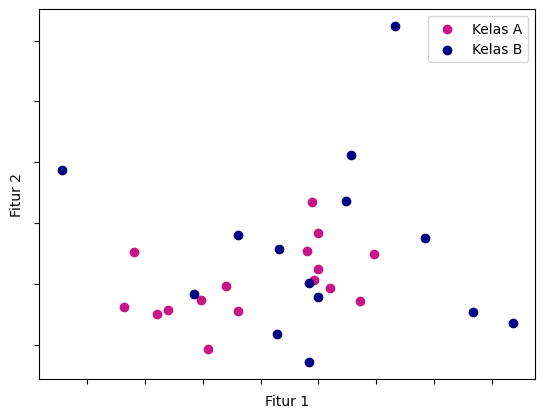

In [5]:
# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
print("Hasilnya,")
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

### Langkah 5 - Model Multinomial Naive Bayes

Selanjutnya buat model naive bayes dengan jenis multinomoial. Sejatinya, _**model multinomial digunakan untuk fitur yang bersifat diskrit**_ (e.g. jumlah kata untuk klasifikasi teks). Akan tetapi kita akan mencoba menggunakan model ini untuk konteks data kontinu _**hanya sebagai pembelajaran.**_

In [6]:
# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Hasilnya,\n")
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasilnya,

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.3333333333333333


### Langkah 6 - Model Gaussian Naive Bayes

Model Gaussian lebih cocok digunakan untuk data kontinu yang kita miliki, hal ini dikarenakan model ini menggunakan distribusi gaussian (normal) yang secara alami memiliki rentang dengan nilai kontinu.

In [7]:
# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print("Hasilnya,")
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasilnya,
Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.4444444444444444


Meskipun hasilnya tidak jauh berbeda dengan model multimodal, secara teoritis kita telah menerapkan langkah yang benar dalam membuat sebuah model klasifikasi dengan menggunakan Naive Bayes.